# Boxplots and violin plots in R

Boxplots and violin plots are commonly used for comparisons across multiple different groups. These can be especially useful for comparing distributions rather than  point estimates or summary statistics.

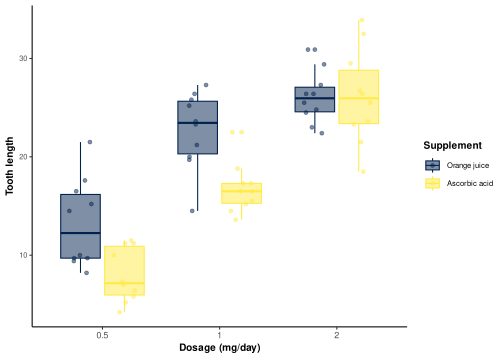

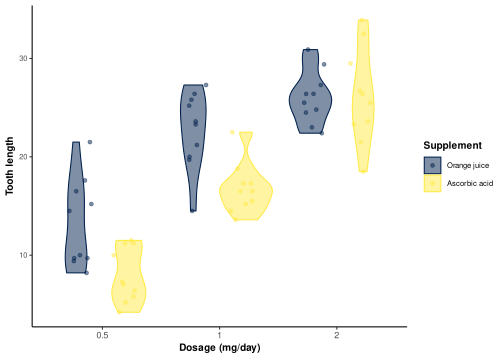

In [1]:
IRdisplay::display_svg(file = "../plots/prettyBox.svg")
IRdisplay::display_svg(file = "../plots/prettyViolin.svg")

In this notebook, we'll be working with the *ToothGrowth* dataset available in base R. This dataset contains tooth growth length data under two supplement treatments and a series of doses for each treatment. We'll walk through the steps involved in generating boxplots and violinplots from this data, first in base R, and also using the *ggplot2* R package.

## Boxplots in base R

Let's start by learning a little about the dataset! 

In [2]:
#Assign ToothGrowth data to new name, get it's dimensions
datTG <- ToothGrowth
dim(datTG)

[1] 60  3

We can see that our dataframe has 60 rows and three separate columns. We can also pull out the first 5 rows to see what the data in each column generally looks like.

In [3]:
#extract out first six rows
head(datTG)

,len,supp,dose
,<dbl>,<fct>,<dbl>
1,4.2,VC,0.5
2,11.5,VC,0.5
3,7.3,VC,0.5
4,5.8,VC,0.5
5,6.4,VC,0.5
6,10.0,VC,0.5


Right away we can see that there is one column we probably want to treat as a continuous variable (column 1, *len*), and two variables that would be best interpreted as categorical variables (columns 2 and 3, *supp* and *dose*), or *factors* in R. Let's check how R is interpreting each column!

In [4]:
#retreive the class of each column
lapply(datTG,class)

$len
[1] "numeric"

$supp
[1] "factor"

$dose
[1] "numeric"

Looks like everything is in order, with the exception of the *dose* column, which is currently interpreted as a numeric. We can change that in a pretty straightforward manner using the *as.factor* function.

In [5]:
#convert dose column to factor
datTG$dose <- as.factor(datTG$dose)

#summary of data
summary(datTG)

      len        supp     dose   
 Min.   : 4.20   OJ:30   0.5:20  
 1st Qu.:13.07   VC:30   1  :20  
 Median :19.25           2  :20  
 Mean   :18.81                   
 3rd Qu.:25.27                   
 Max.   :33.90                   

In our summary, we can see listed for the *supp* and *dose* columns the number of observations associateed with each level, or category, of the variable. The category names for the supplement column are a little uninformative, so let's go ahead and rename them to something better!

In this case, *OJ* is shorthand for *Orange juice* and *VC* is short hand for *Ascorbic acid*, so let's use those long form names! We'll accomplish this by supplying a vector of new names to the output of the *levels* function.

In [6]:
levels(datTG$supp)

[1] "OJ" "VC"

In [7]:
levels(datTG$supp) <- c("Orange juice","Ascorbic acid")

**Note:** By default, R sorts factor levels in alphabetical order. The vector of new names supplied  is expected to correspond with the sorted old factor levels (i.e. the first vector element is the new name for the first sorted old name), so make sure you're aware of this sorted order!

We should now be ready to generate our first boxplot! We'll first demonstrate how we can do this without the use of any R packages.

First, let's compare across the two supplement treatments.

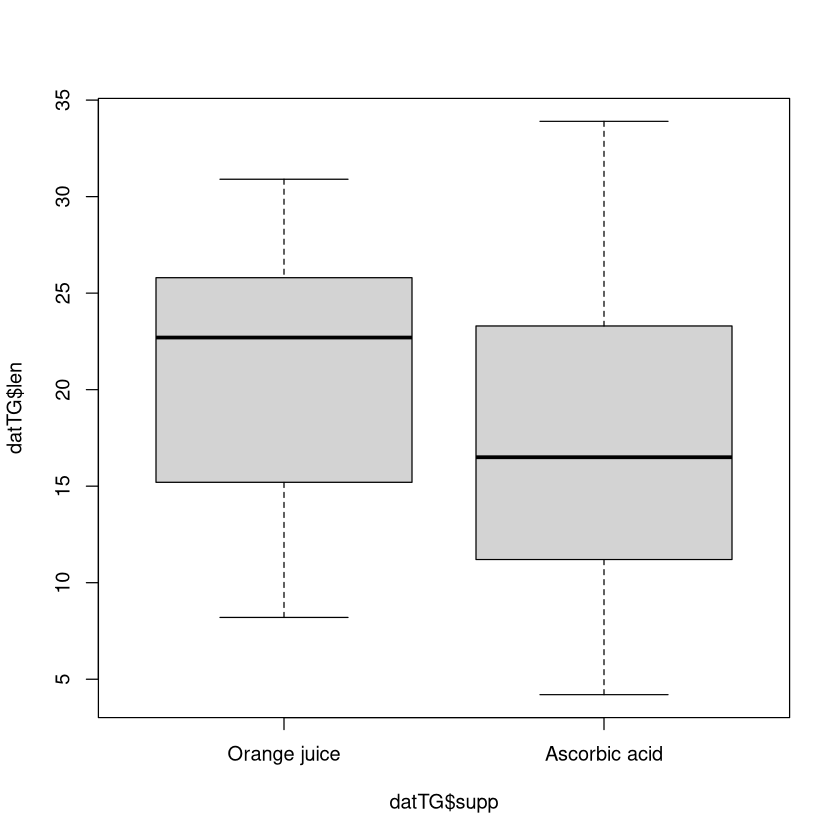

In [8]:
#first boxplot
boxplot(datTG$len ~ datTG$supp) #response ~ predictor

We can add custom axis labels and colors to help make this plot a little more pretty.

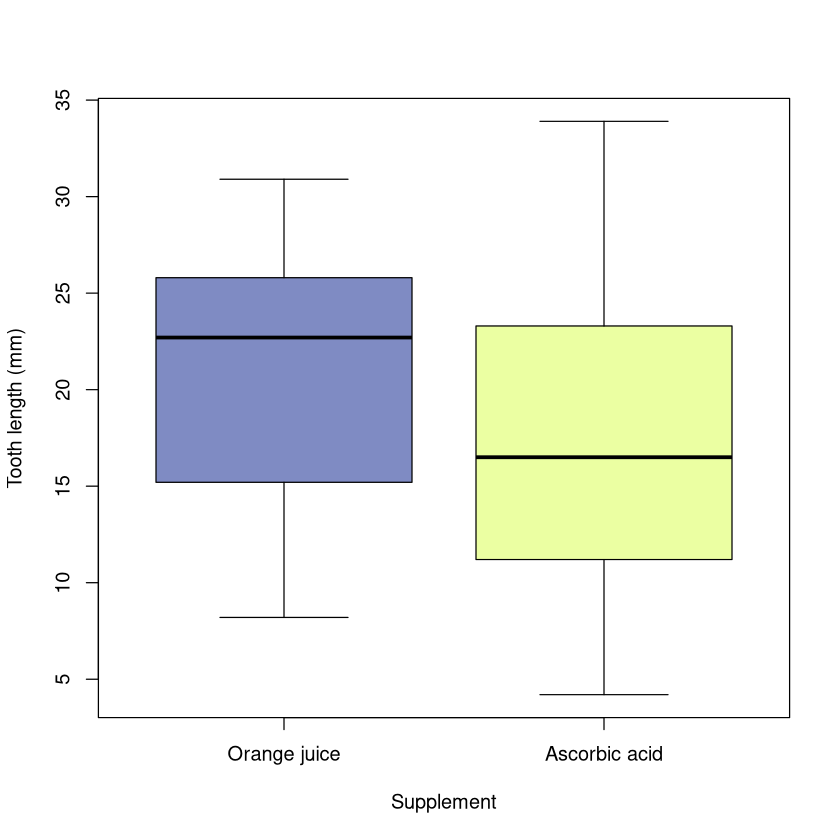

In [9]:
#pretty boxplot
boxplot(datTG$len ~ datTG$supp, #response ~ predictor
       xlab="Supplement", #X axis label
       ylab="Tooth length (mm)", #Y axis label
       col=hcl.colors(2,palette="plasma",alpha=0.5), #sample two colors from the "plasma" palette 
       whisklty = 1) #change line type 

If we wanted a more nuanced way of viewing this comparison, for example comparing the supplement treatments across each dosage, we can also add a second level of comparison within our formula. Adding this second level of comparison involves including a second predictor variable to our formula, separated from the first predictor variable by a * symbol. This designates an interaction between the two predictor variables, i.e. the response variable observations will be split across all possible combinations of the two predictor variables.

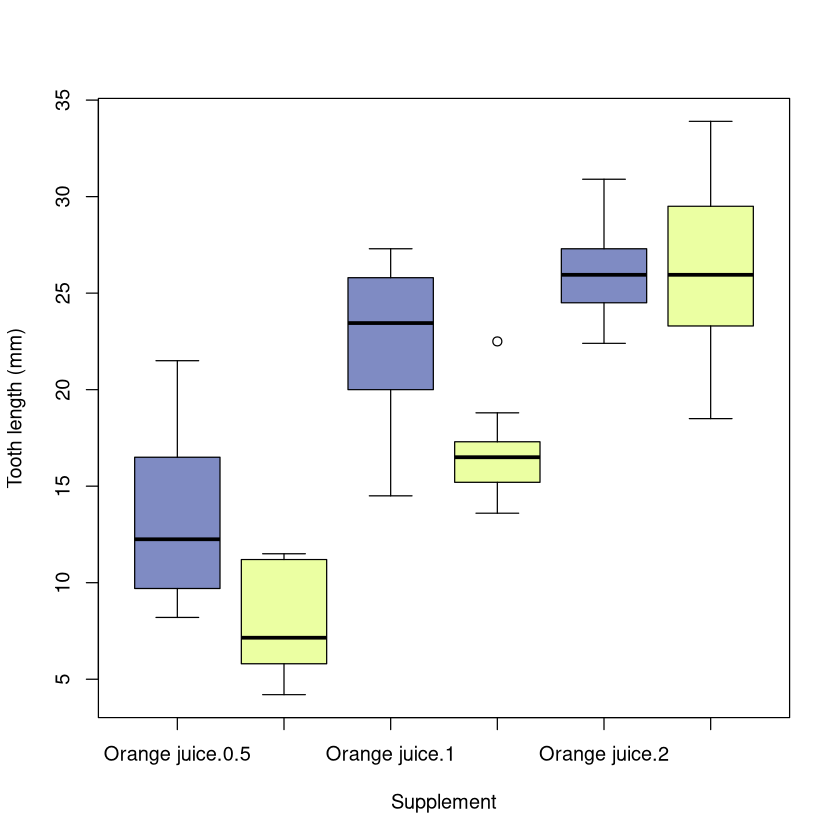

In [10]:
#comparing across multiple variables boxplot
boxplot(datTG$len ~ datTG$supp * datTG$dose, #response ~ predictor1 * predictor2
       xlab="Supplement", #X axis label
       ylab="Tooth length (mm)", #Y axis label
       col=hcl.colors(2,palette="plasma",alpha=0.5), #sample two colors from the "plasma" palette
       whisklty = 1) #change line type

We can see however, that this has changed our X axis labels quite a bit. Let's see if we can fix that! When working in base R, modifying axis labels post-hoc in this manner in this manner is not super trivial, so the easiest solution is often to just set the original plot to have no labels on the axis, and then add them separately later.

While we modify these labels, let's also go ahead and add a simple legend to the plot as well!

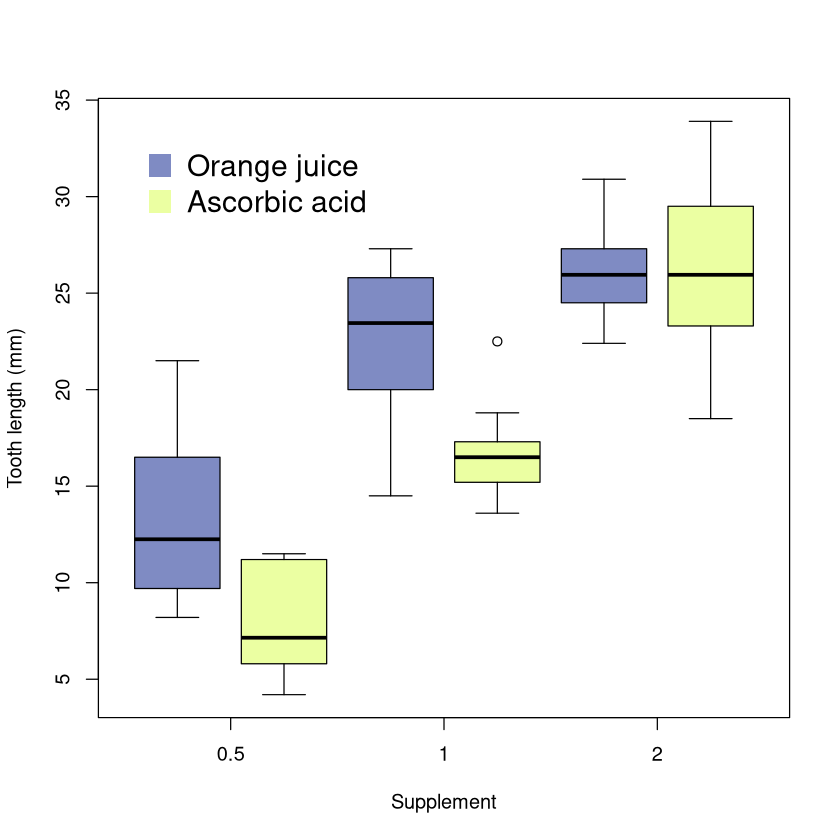

In [11]:
#Comparing across multiple variables
boxplot(datTG$len ~ datTG$supp*datTG$dose, #response ~ predictor1 * predictor2
       xlab="Supplement", #X axis label
       ylab="Tooth length (mm)", #Y axis label
       col=hcl.colors(2,palette="plasma",alpha=0.5), #sample two colors from the "plasma" palette
       whisklty = 1, #change line type
       xaxt="n") #set interior x axis label to null

#add new X axis label
axis(1, #specify x axis labelling
     at = seq(1.5 , 5.5 , 2), #designate spacing of labels (sequence by 2 from 1.5 to 5.5)
     labels = c(0.5,1,2) , #specify new labels
     tick=TRUE , cex=0.3) #Axis label size, add ticks for each label

#add legend for colors
legend("topleft", #general positioning of legend
       legend = c("Orange juice", "Ascorbic acid"), #legend categories
       col=hcl.colors(2,palette="plasma",alpha=0.5), #color for boxes
       pch = 15, bty = "n", pt.cex = 2.5, cex = 1.5,  horiz = F, inset = c(0.05, 0.05)) #legend shape, size, detailed positioning (insets)


Much better! Something else that can sometimes be useful is overlaying actual data points on top of your boxplots. To limit any overlapping of points, we'll also slightly scatter observations for each level along the X axis using the jitter function.

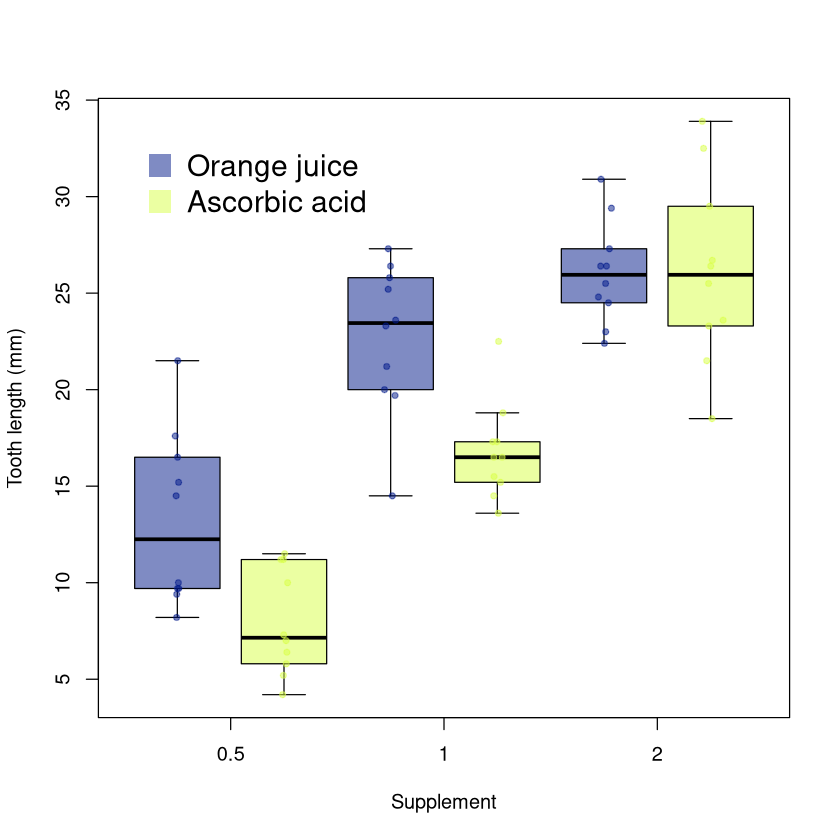

In [12]:
#Comparing across multiple variables
boxplot(datTG$len ~ datTG$supp*datTG$dose, #response ~ predictor1 * predictor2
       xlab="Supplement", #X axis label
       ylab="Tooth length (mm)", #Y axis label
       col=hcl.colors(2,palette="plasma",alpha=0.5), #sample two colors from the "plasma" palette
       whisklty = 1, #change line type
       xaxt="n",
       outline=F) #set interior x axis label to null

#add new X axis label
axis(1, #specify x axis labelling
     at = seq(1.5 , 5.5 , 2), #designate spacing of labels (sequence by 2 from 1.5 to 5.5)
     labels = c(0.5,1,2) , #specify new labels
     tick=TRUE , cex=0.3) #Axis label size, add ticks for each label

#add legend for colors
legend("topleft", #general positioning of legend
       legend = c("Orange juice", "Ascorbic acid"), #legend categories
       col=hcl.colors(2,palette="plasma",alpha=0.5), #color for boxes
       pch = 15, bty = "n", pt.cex = 2.5, cex = 1.5,  horiz = F, inset = c(0.05, 0.05)) #legend shape, size, detailed positioning (insets)

#define levels
levels <- unique(expand.grid(levels(datTG$supp),levels(datTG$dose)))

#loop through levels
for(i in 1:6){
    colIndex <- ifelse(levels[i,1] =="Orange juice",1,2)
    
    #subset to current data
    curLevelDat <- subset(datTG,supp==levels[i,1] & dose==levels[i,2])

    #build jitter
    curJitter <- jitter(rep(i, nrow(curLevelDat)))

    #add points
    points(curJitter, curLevelDat$len, pch=20, col=hcl.colors(2,palette="plasma",alpha=0.5)[colIndex]) 
}

If we wanted to go ahead and save this figure, we would wrap the code to generate the plot with the *pdf()*/*png()* and *dev.off()* functions.

In [13]:
#start pdf device
svg("../plots/baseBox.svg") #edit path inside brackets
#Comparing across multiple variables
boxplot(datTG$len ~ datTG$supp*datTG$dose, #response ~ predictor1 * predictor2
       xlab="Supplement", #X axis label
       ylab="Tooth length (mm)", #Y axis label
       col=hcl.colors(2,palette="plasma",alpha=0.5), #sample two colors from the "plasma" palette
       whisklty = 1, #change line type
       xaxt="n",
       outline=F) #set interior x axis label to null

#add new X axis label
axis(1, #specify x axis labelling
     at = seq(1.5 , 5.5 , 2), #designate spacing of labels (sequence by 2 from 1.5 to 5.5)
     labels = c(0.5,1,2) , #specify new labels
     tick=TRUE , cex=0.3) #Axis label size, add ticks for each label

#add legend for colors
legend("topleft", #general positioning of legend
       legend = c("Orange juice", "Ascorbic acid"), #legend categories
       col=hcl.colors(2,palette="plasma",alpha=0.5), #color for boxes
       pch = 15, bty = "n", pt.cex = 2, cex = 1,  horiz = F, inset = c(0.05, 0.05)) #legend shape, size, detailed positioning (insets)

#define levels
levels <- unique(expand.grid(levels(datTG$supp),levels(datTG$dose)))

#loop through levels
for(i in 1:6){
    colIndex <- ifelse(levels[i,1] =="Orange juice",1,2)
    
    #subset to current data
    curLevelDat <- subset(datTG,supp==levels[i,1] & dose==levels[i,2])

    #build jitter
    curJitter <- jitter(rep(i, nrow(curLevelDat)))

    #add points
    points(curJitter, curLevelDat$len, pch=20, col=hcl.colors(2,palette="plasma",alpha=0.5)[colIndex]) 
}
dev.off()

pdf 
  2

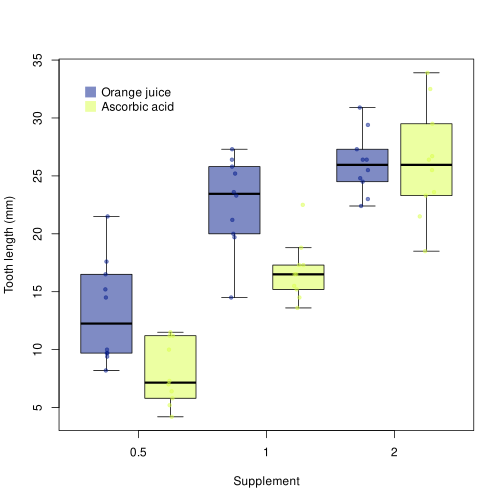

In [14]:
IRdisplay::display_svg(file = "../plots/baseBox.svg")

## Boxplots and violin plots in *ggplot2*

It's arguably even easier to generate a plot similar to this using the R package ggplot2, which also gives us the ability to play around with violin plots as well!

Let's start by loading the R package ggplot2, which is already pre-installed on all JupyterLite servers!

In [15]:
#load the ggplot2 package
library(ggplot2)

We can start with a pretty basic boxplot that splits our response variable across the 6 different categories. You'll notice that our syntax in *ggplot2* is slightly modified compared to when we are working in base R. 

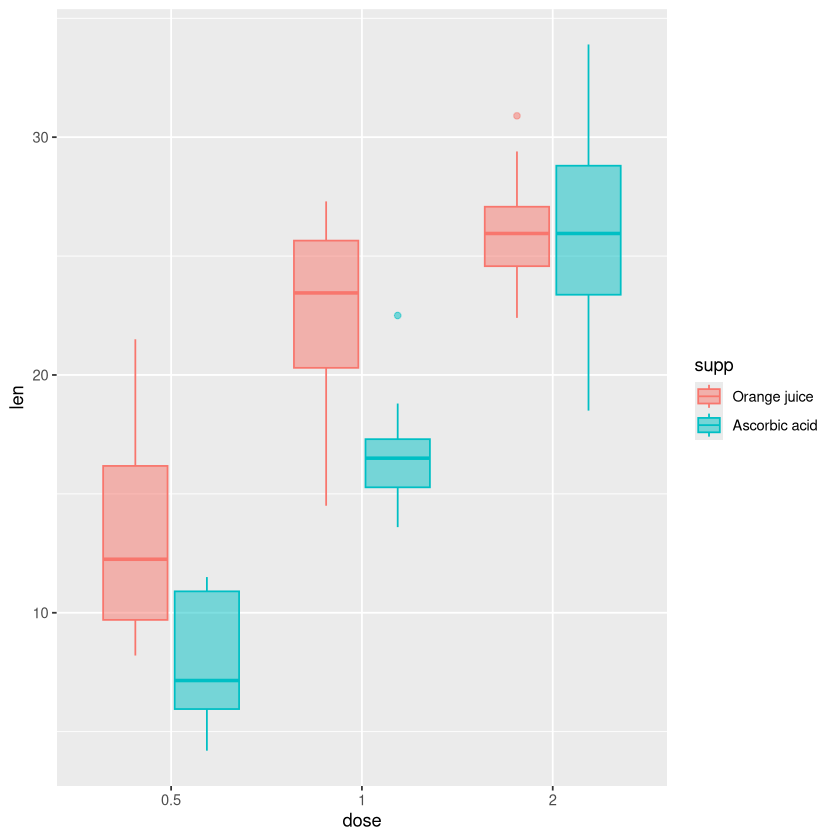

In [16]:
#basic ggplot boxplot
ggplot(datTG, #specify dataframe to pull data from
       aes(x=dose, #specify X axis column (response)
           y=len, #specify Y axis column (predictor 1)
           fill=supp, #specify column to split the fill colors by (predictor 2)
           col=supp))+ #specify column to split the line colors by (predictor 2)
    geom_boxplot(alpha=0.5) #specify plot type (boxplot), add some transparency

Next, let's switch this from a boxplot to a violin plot by simply switching *geom_boxplot()* to *geom_violin()*.

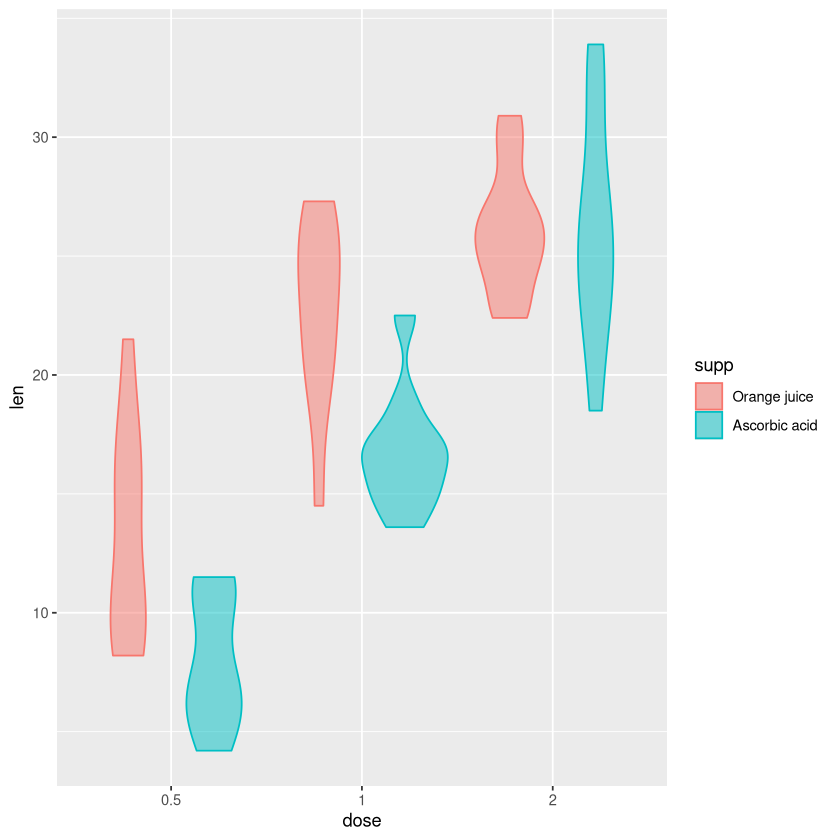

In [17]:
#basic ggplot violin plot
ggplot(datTG, #specify dataframe to pull data from
       aes(x=dose, #specify X axis column (response)
           y=len, #specify Y axis column (predictor 1)
           fill=supp, #specify column to split the fill colors by (predictor 2)
           col=supp))+ #specify column to split the line colors by (predictor 2)
    geom_violin(alpha=0.5) #specify plot type (boxplot), add some transparency

We can then add in all the components that were present in our base R plot, like unique axis and legend titles, observations for each data point, and a new color palette!

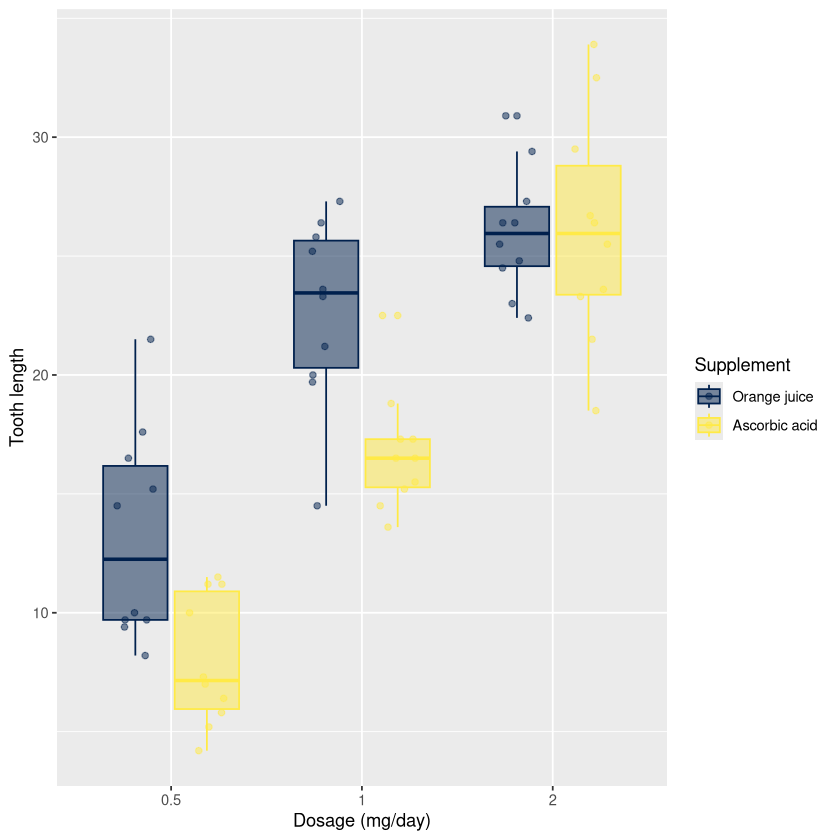

In [18]:
#cool ggplot boxplot
coolBox <- ggplot(datTG, #specify dataframe to pull data from. we're also saving this plot to an object so we can save, refer to it later
       aes(x=dose, #specify X axis column (response)
           y=len, #specify Y axis column (predictor 1)
           fill=supp, #specify column to split the fill colors by (predictor 2)
           col=supp))+ #specify column to split the line colors by (predictor 2)
    geom_boxplot(alpha=0.5)+ #specify plot type (boxplot), add some transparency
    geom_jitter(alpha=0.5,position=position_jitterdodge(seed=123))+ #add jitter (individual datapoints)
    scale_y_continuous("Tooth length")+ #change y axis label
    scale_x_discrete("Dosage (mg/day)") + #change x axis label
    labs(fill="Supplement",color="Supplement")+ #change legend title
    scale_fill_viridis_d(option="cividis")+ #change fill color palette
    scale_color_viridis_d(option="cividis") #change line color palette

coolBox

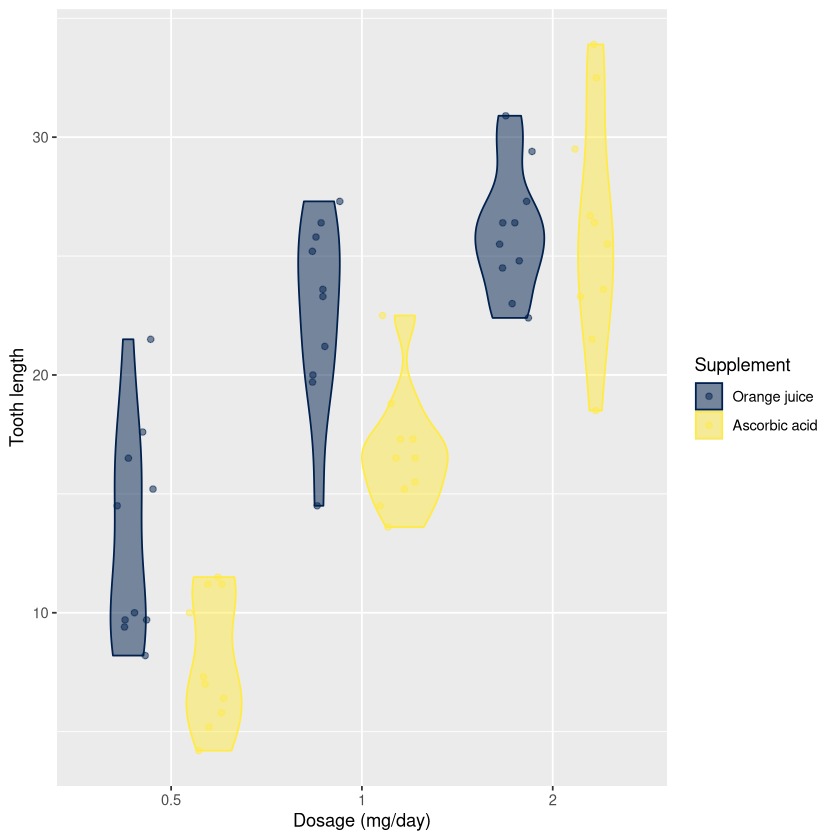

In [19]:
#cool ggplot violin plot
coolViolin <- ggplot(datTG, #specify dataframe to pull data from. we're also saving this plot to an object so we can save, refer to it later
       aes(x=dose, #specify X axis column (response)
           y=len, #specify Y axis column (predictor 1)
           fill=supp, #specify column to split the fill colors by (predictor 2)
           col=supp))+ #specify column to split the line colors by (predictor 2)
    geom_violin(alpha=0.5)+ #specify plot type (boxplot), add some transparency
    geom_jitter(alpha=0.5,position=position_jitterdodge(seed=123))+ #add jitter (individual datapoints)
    scale_y_continuous("Tooth length")+ #change y axis label
    scale_x_discrete("Dosage (mg/day)") + #change x axis label
    labs(fill="Supplement",color="Supplement")+ #change legend title
    scale_fill_viridis_d(option="cividis")+ #change fill color palette
    scale_color_viridis_d(option="cividis") #change line color palette

coolViolin

One of the cool things about *ggplot2* is that we can define specific themes for our plots that modify elements like the plot background and text size. We can modify our themes so that the plot comes out looking the way that we like, then save that theme and use it for our future plots!

In [20]:
#define theme
themeBoxViolin <- theme(panel.grid.major = element_blank(), #save theme to object, remove grid from background
        panel.grid.minor = element_blank(), #remove grid from background
        panel.background= element_blank(), #remove gray background
        axis.line = element_line(colour = "black"), #add black axis lines
        axis.text.y = element_text(size = 7.5), #modify axis text size
        axis.title = element_text(face = "bold", #modify axis title size
                                  size = 10),
        legend.text = element_text(size=7.5), #modify legend text size
        legend.title = element_text(face = "bold", #modify legend title size
                                  size = 10),
        legend.key.height= unit(0.25,"inch"), #modify legend height
        legend.key.width = unit(0.25,"inch")) #modify legend width

We can then add this theme to our existing plot to see what the changes we've made look like!

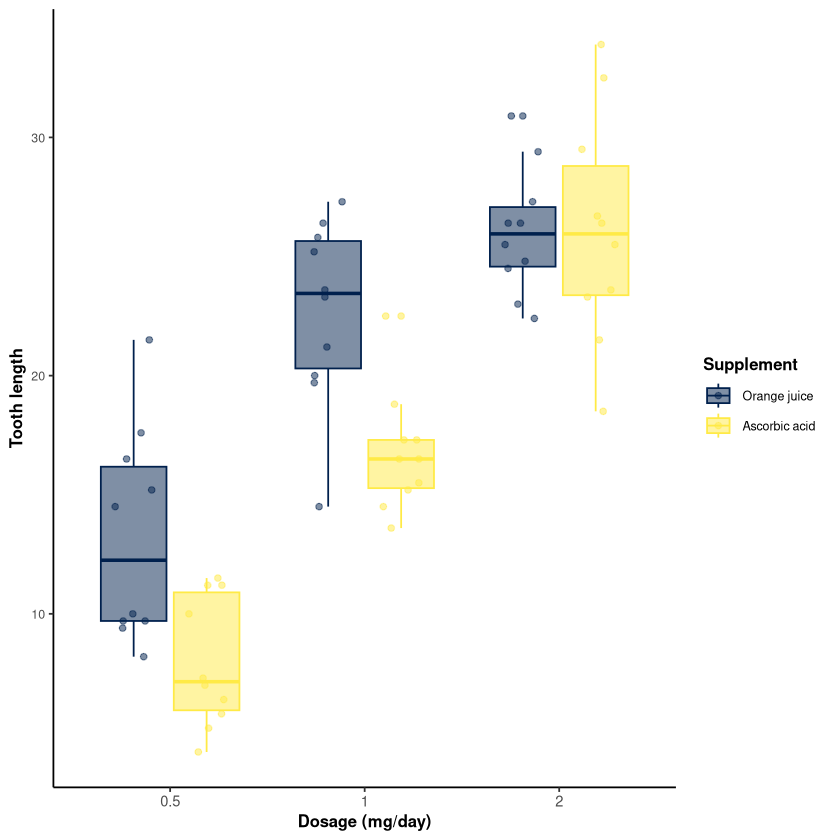

In [21]:
#pretty boxplot
prettyBox <- coolBox + themeBoxViolin
prettyBox

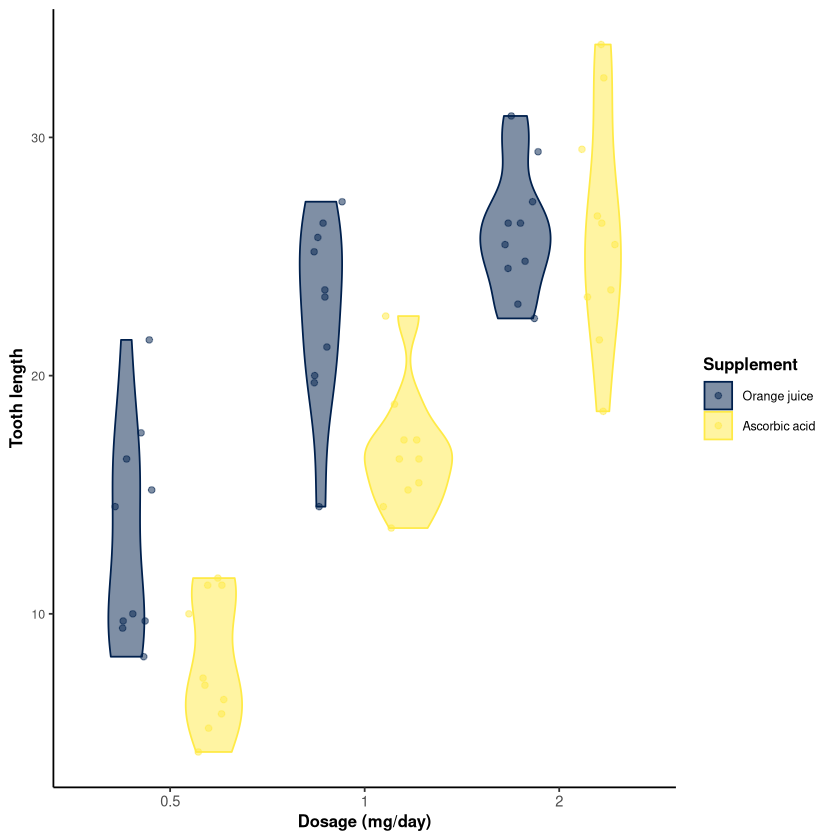

In [22]:
#pretty boxplot
prettyViolin <- coolViolin + themeBoxViolin
prettyViolin

Nice! Let's go ahead and save these plots now without using the standard *ggsave()* command. Instead let's us the same commands we used before. `svg()`, `print()`, and `dev.off()`.

In [23]:
# Save to SVG using base R
## Save Box plot
svg("../plots/prettyBox.svg", width = 7, height = 5, )
print(prettyBox)  # Important: use print() to output ggplot2 object
dev.off()

## Save Violin plot
svg("../plots/prettyViolin.svg", width = 7, height = 5)
print(prettyViolin)  # Important: use print() to output ggplot2 object
dev.off()

pdf 
  2

pdf 
  2